In [1]:
import pygmo as pg
import numpy as np

from f3dasm.simulation.benchmark_functions import Levy, Ackley, Schwefel
from f3dasm.src.optimization import PygmoProblem
from f3dasm.optimization.pygmo_implementations import UDA_SGD
from f3dasm.src.designofexperiments import DoE
from f3dasm.src.space import ContinuousSpace
from f3dasm.src.data import Data
from f3dasm.sampling.latinhypercube import LatinHypercube

In [2]:
def make_nd_continuous_design(bounds: list, dimensions: int):
    input_space, output_space = [], []
    for dim in range(dimensions):
        input_space.append(ContinuousSpace(name=f"x{dim}", lower_bound=bounds[0], upper_bound=bounds[1]))

    output_space.append(ContinuousSpace(name="y"))

    return DoE(input_space=input_space, output_space=output_space)

In [3]:
dimensions=5
design = make_nd_continuous_design(bounds=[-10.,10.], dimensions=dimensions)

In [4]:
# # Input parameters
# x1 = ContinuousSpace(name="x1", lower_bound=-10., upper_bound=10.)
# x2 = ContinuousSpace(name="x2", lower_bound=-10., upper_bound=10.)
# x3 = ContinuousSpace(name="x3", lower_bound=-10., upper_bound=10.)
# x4 = ContinuousSpace(name="x4", lower_bound=-10., upper_bound=10.)
# x5 = ContinuousSpace(name="x5", lower_bound=-10., upper_bound=10.)
# x6 = ContinuousSpace(name="x6", lower_bound=-10., upper_bound=10.)

# # Output parameters
# y = ContinuousSpace(name="y")

# input_space = [x1, x2, x3, x4 ,x5, x6]
# output_space = [y]

# # Construct the design space
# design = DoE(input_space=input_space, output_space=output_space)

In [5]:
# algorithm = pg.algorithm(pg.cmaes(gen=1, memory=True, seed=42, force_bounds=True))
algorithm = pg.algorithm(pg.cmaes(memory=True))
levy = Schwefel(noise=True)

prob = pg.problem(PygmoProblem(design=design, func=levy))

In [42]:
pop = pg.population(prob, size = 30)


# Sampler
lhs_sampler = LatinHypercube(doe=design, seed=42)
samples = lhs_sampler.get_samples(numsamples=30)
samples

d = Data(doe=design)
d.add(samples)
samples = d.get_input_data().to_numpy()

y = levy.eval(samples)
y

d.add_output(output=y, label="y")
d.data.to_numpy()

pop.set_x(range(30),d.get_input_data().to_numpy, d.get_output_data().to_numpy())


TypeError: set_x(): incompatible function arguments. The following argument types are supported:
    1. (self: pygmo.core.population, arg0: int, arg1: numpy.ndarray[numpy.float64]) -> None

Invoked with: Problem name: <class 'f3dasm.src.optimization.PygmoProblem'>
	C++ class name: pybind11::object

	Global dimension:			5
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10, -10, -10, -10]
	Upper bounds: [10, 10, 10, 10, 10]
	Has batch fitness evaluation: true

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 5
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 30
	Gradient evaluations: 0

	Thread safety: none

Population size: 30

List of individuals: 
#0:
	ID:			13728573248828157286
	Decision vector:	[6.14429, 5.89496, 3.90283, -4.54762, -0.718046]
	Fitness vector:		[1606.75]
#1:
	ID:			11572663815097421560
	Decision vector:	[-0.721715, 1.5034, 9.82523, 5.05999, -3.52713]
	Fitness vector:		[1465.05]
#2:
	ID:			2931732585482132718
	Decision vector:	[-8.01966, -5.3482, -3.41504, 5.72356, -1.33662]
	Fitness vector:		[2171.28]
#3:
	ID:			15073302581771555768
	Decision vector:	[9.91637, 4.2742, 1.43414, -9.13911, 8.98938]
	Fitness vector:		[1731.97]
#4:
	ID:			8545585436643592514
	Decision vector:	[3.20772, 9.60582, -3.29504, -7.67487, -9.684]
	Fitness vector:		[2081.02]
#5:
	ID:			9945117316392583384
	Decision vector:	[1.22698, 0.907027, 6.68668, -5.87189, -8.08964]
	Fitness vector:		[1871.68]
#6:
	ID:			2644364808064895919
	Decision vector:	[3.80903, 7.8785, -6.82471, -0.588773, -0.687227]
	Fitness vector:		[1344.43]
#7:
	ID:			1897102545249950528
	Decision vector:	[-3.25916, 6.36042, 4.80844, 8.923, -6.79587]
	Fitness vector:		[2242.11]
#8:
	ID:			14263767861406453337
	Decision vector:	[-1.45082, -8.39594, 0.467259, -8.65016, -1.92453]
	Fitness vector:		[1927.38]
#9:
	ID:			17653914741651837695
	Decision vector:	[-6.68312, 4.14532, 4.41642, 7.43243, -2.48027]
	Fitness vector:		[2123.94]
#10:
	ID:			6959030855903425098
	Decision vector:	[-3.76757, -5.09874, 9.66401, -3.07543, 2.96221]
	Fitness vector:		[1726.65]
#11:
	ID:			694543780292011665
	Decision vector:	[-2.04568, 4.42643, -3.97715, -1.31604, -0.159695]
	Fitness vector:		[1957.53]
#12:
	ID:			12271416910622044974
	Decision vector:	[-0.0656699, 6.26166, -5.78528, -1.29465, 5.43483]
	Fitness vector:		[2745.28]
#13:
	ID:			16632694472731367676
	Decision vector:	[2.73825, -0.135436, -4.79326, 0.641845, -0.391934]
	Fitness vector:		[2149.79]
#14:
	ID:			17024408580737199338
	Decision vector:	[-3.91927, -5.52942, -0.688093, -8.826, -8.70712]
	Fitness vector:		[2337.59]
#15:
	ID:			5306819449839282321
	Decision vector:	[-9.70369, 0.335434, 0.0116491, -4.24983, 4.85956]
	Fitness vector:		[1562.37]
#16:
	ID:			7693938642139377810
	Decision vector:	[9.13145, 9.27657, 3.90181, 7.50792, -1.33983]
	Fitness vector:		[3085.13]
#17:
	ID:			254906378732804678
	Decision vector:	[-1.24961, -4.91147, -0.0562338, 1.84075, -7.12621]
	Fitness vector:		[2876.17]
#18:
	ID:			8428216164323545872
	Decision vector:	[-1.87161, -3.99176, 5.26958, 5.04205, -9.15324]
	Fitness vector:		[2664.45]
#19:
	ID:			2882019282483973692
	Decision vector:	[-7.17724, -9.69594, 9.95934, -4.12872, -0.529443]
	Fitness vector:		[2451.09]
#20:
	ID:			4012088141707430477
	Decision vector:	[8.49301, -0.0632408, -4.87359, -3.85375, 4.54928]
	Fitness vector:		[2103]
#21:
	ID:			14714146641002992868
	Decision vector:	[-0.673185, -2.39426, -5.72081, -6.05957, -3.95895]
	Fitness vector:		[2295.6]
#22:
	ID:			5226318322852080806
	Decision vector:	[6.42864, -7.97453, 9.17828, 1.56968, 0.0576548]
	Fitness vector:		[2529.54]
#23:
	ID:			17278187108753660534
	Decision vector:	[-4.95058, -5.28283, -2.10798, -9.92266, 7.68419]
	Fitness vector:		[1837.77]
#24:
	ID:			16854590629727095431
	Decision vector:	[-3.3882, -5.06088, -2.64745, -2.85783, -4.32418]
	Fitness vector:		[1923.68]
#25:
	ID:			1763595906378490332
	Decision vector:	[-8.15583, 9.41046, -5.67267, -8.02776, -5.68161]
	Fitness vector:		[1403.47]
#26:
	ID:			7224079146296239075
	Decision vector:	[4.06757, -5.13886, 1.22554, 9.07337, 8.25504]
	Fitness vector:		[1768]
#27:
	ID:			12404816273372412141
	Decision vector:	[0.506596, 7.32911, 7.07428, -7.0006, 0.215825]
	Fitness vector:		[2786.36]
#28:
	ID:			8003430779679715044
	Decision vector:	[1.77842, -7.27374, -4.57746, 0.00704319, -6.08776]
	Fitness vector:		[1963.32]
#29:
	ID:			2058069706821124972
	Decision vector:	[7.83926, 0.294788, -7.96052, -8.84105, 4.3781]
	Fitness vector:		[1959.32]

Champion decision vector: [3.80903, 7.8785, -6.82471, -0.588773, -0.687227]
Champion fitness: [1344.43]
, range(0, 30), <bound method DataFrame.to_numpy of           x0        x1        x2        x3        x4
0   1.550122 -1.239384 -3.653288 -0.123026 -2.934733
1  -1.740882 -0.534190  3.542904  6.073368  8.647855
2   2.995864  0.514180 -1.447508 -8.932590  2.738594
3  -3.558318  3.757607 -0.798535  5.205414 -3.876764
4  -5.594970 -7.240337 -5.956632 -7.089092 -5.356245
5   6.538293  9.739710 -0.662985 -3.635526  5.692895
6  -4.794402 -6.533551 -8.755883  2.374185 -5.039898
7   4.166195 -1.819101 -7.138570  8.242420  6.151957
8  -8.652944 -9.294611  7.413244 -1.762164 -4.494147
9  -0.151837  7.481405 -2.536011  1.924808  8.856560
10 -0.971536 -7.797172  8.998166 -6.271724 -6.635700
11 -4.585308  7.212010  5.457713  0.709039  5.088936
12  9.308298  1.082199  6.212002 -2.736782 -1.812710
13  6.951405 -2.607672  1.758372 -2.636515 -0.675409
14  0.486005  4.774148 -6.323844  4.152532  4.051320
15  8.215469 -8.020060 -7.650162  5.928373 -2.449780
16  7.611607 -3.792193 -5.268219 -8.525107  1.648143
17 -6.925431  4.273589  0.887265 -5.367410  0.873988
18  5.914307 -2.816578 -2.707001 -4.877178 -8.545450
19  1.242069  6.597394  5.286465  2.683613 -7.805847
20 -2.686944  5.869115 -9.512004  9.367653  2.513978
21 -7.877730  1.819737  4.503701  3.672380  0.077246
22  4.859834  8.345860  2.951694 -1.283633 -7.029287
23 -6.143216 -5.130257  8.468679  6.671301  7.007165
24 -2.052084 -9.366190  7.240487  7.558410 -0.195428
25  3.354286 -4.336549  0.049363 -9.600894 -9.895988
26 -9.229337  8.834522  2.507190 -7.712037  3.938378
27  2.079729 -5.886317 -8.111705 -4.060453 -8.861285
28  9.357925  3.015155  9.668453  8.867252  9.519098
29 -9.750307  2.475497 -4.643741  0.238977  7.961940>, array([[1910.82864206],
       [2412.55822912],
       [2528.98441303],
       [1951.68119673],
       [1721.68595921],
       [1876.58107556],
       [2404.62318422],
       [2128.88541087],
       [2364.65871882],
       [2828.52810575],
       [2201.61204722],
       [1749.5105338 ],
       [2536.70054643],
       [2117.1039122 ],
       [2451.20706416],
       [2543.59553301],
       [1697.08622902],
       [2676.68782215],
       [2482.9036086 ],
       [1834.27947786],
       [2218.32568241],
       [2195.84678754],
       [2100.47049139],
       [2458.96242533],
       [2693.06240633],
       [2098.87821406],
       [2647.595968  ],
       [2520.05087719],
       [2185.92429752],
       [2167.66282563]])

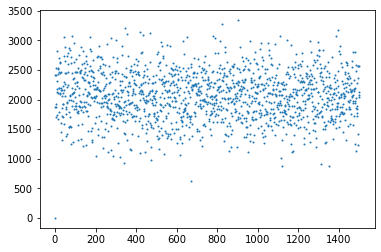

In [7]:
xx, yy = np.empty(shape=(1,dimensions)), np.empty(shape=(1,1))
# xx = np.array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]])
# yy = levy.eval(xx)
for i in range(50):
    pop = algorithm.evolve(pop)
    xx = np.r_[xx, pop.get_x()]
    yy = np.r_[yy, pop.get_f()]


import pandas as pd
pd.DataFrame(data=yy)
import matplotlib.pyplot as plt

plt.scatter(np.arange(len(yy.ravel())),yy.ravel(), s=1)

yy
columnlabels = [("input",f"x{i}") for i in range(dimensions)]
columnlabels.append(("output", "y"))
columnlabels
df = pd.DataFrame(data=np.c_[xx,yy],columns=columnlabels)

/home/martin/Documents/GitHub/testthings/f3dasm/src/data.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


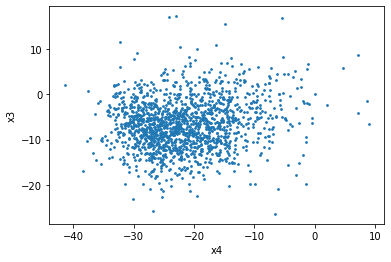

In [8]:
data = Data(design)
data.add(df)
data.plot(input_par1="x4", input_par2="x3")

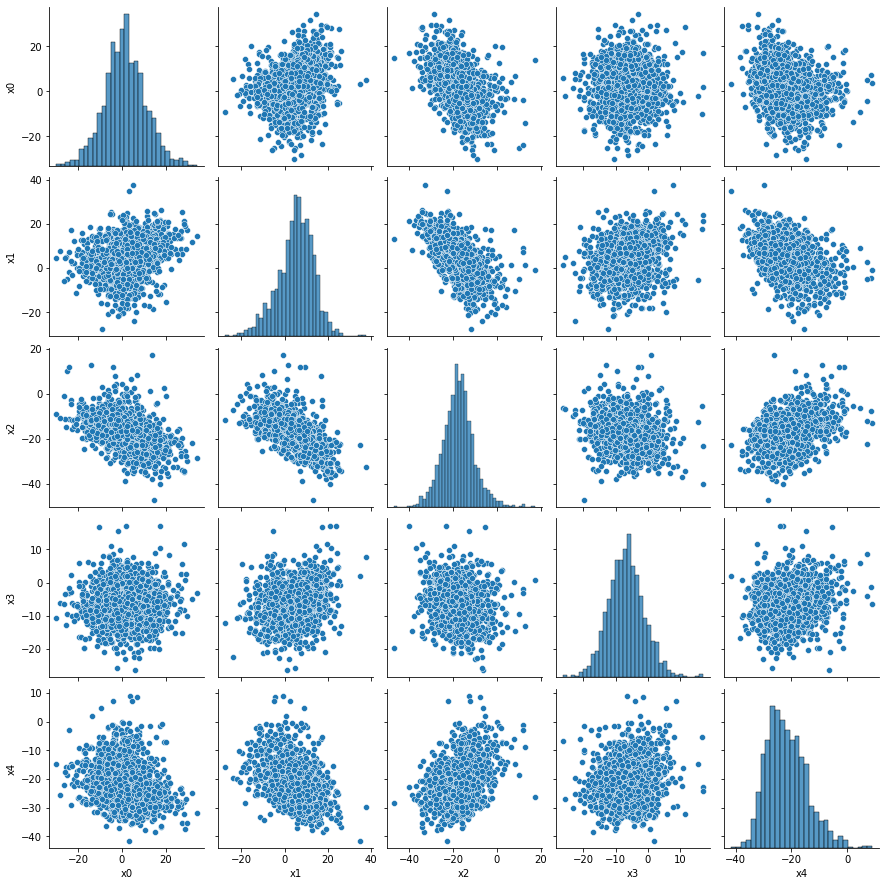

In [9]:
data.plot_pairs()

In [10]:
import seaborn as sns

In [11]:
sns.set_theme(style="white")

df = sns.load_dataset("penguins")
df = data.get_input_data()



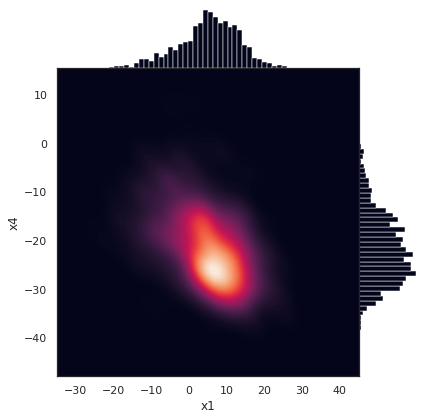

In [12]:
g = sns.JointGrid(data=df, x="x1", y="x4", space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=50)